**STAGE 1 Dataset Selection and Exploration**

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
import pandas as pd
data = pd.read_csv('sepatu.csv', delimiter=',', encoding="ISO-8859-1")
data

,Brand_Name,How_Many_Sold,Current_Price,Product_details,RATING
0,ASIAN,"2,242","1,098","Oxygen-01 Sports Running,Walking & Gym Shoes w...",3.8
1,ASIAN,240,674,"Men's Express-08 Sports Running,Walking,Gym,Tr...",4.0
2,ASIAN,"16,662",588,"Men's Cosko Sports Running,Walking,Gym,Trainin...",3.8
3,ASIAN,135,599,"Wind-03 Sports Running,Walking & Gym Shoes wit...",4.0
4,Reebok,240,982,Men's Velocity Runner Lp Running Shoe,4.0
...,...,...,...,...,...
23935,Campus,198,623,Men's HARVEL PRO Running Shoes,4.0
23936,Wakefield,49,399,Stylish Running Sports Shoes for MEN-2010,3.4
23937,URJO,557,839,Mens Running Shoes,4.2
23938,FEETEES,63,349,Nexon Men's Casual Eva Socks Knitted Running S...,3.6


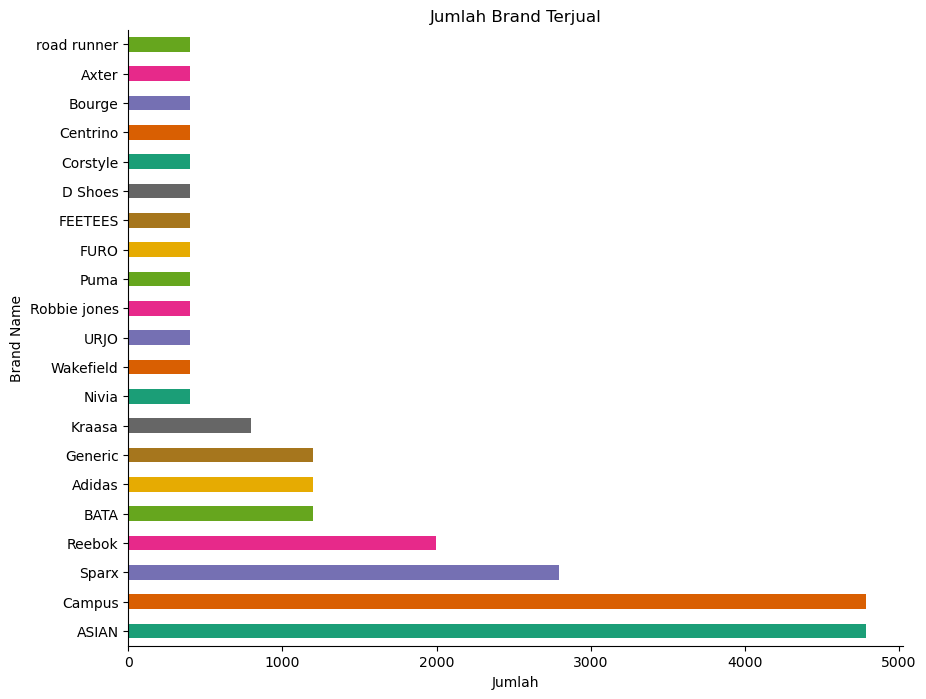

In [11]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Misalkan 'data' adalah DataFrame Anda
# Kelompokkan data berdasarkan 'Brand_Name' dan hitung ukuran masing-masing grup
brand_counts = data.groupby('Brand_Name').size().sort_values(ascending=False)

# Plot hasil
plt.figure(figsize=(10, 8))
brand_counts.plot(kind='barh', color=sns.color_palette('Dark2', n_colors=len(brand_counts)))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Jumlah')
plt.ylabel('Brand Name')
plt.title('Jumlah Brand Terjual')
plt.show()

**STAGE 2 Data Preprocessing**

In [14]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming 'data' is your DataFrame
imputer = SimpleImputer(strategy='most_frequent')  # Use 'most_frequent' for categorical features
# Select only categorical columns for imputation
categorical_features = ['Brand_Name', 'Product_details']
data[categorical_features] = imputer.fit_transform(data[categorical_features])

# Continue with the rest of your preprocessing steps...
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()

# Check if 'Current_Price' is in the list before removing
if 'How_Many_Sold' in numerical_features:
    numerical_features.remove('How_Many_Sold')  # Assuming you want to exclude 'Current_Price'

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])
print(data.head())

  Brand_Name  How_Many_Sold Current_Price  \
0      ASIAN         2242.0         1,098   
1      ASIAN          240.0           674   
2      ASIAN        16662.0           588   
3      ASIAN          135.0           599   
4     Reebok          240.0           982   

                                     Product_details  RATING  
0  Oxygen-01 Sports Running,Walking & Gym Shoes w...     3.8  
1  Men's Express-08 Sports Running,Walking,Gym,Tr...     4.0  
2  Men's Cosko Sports Running,Walking,Gym,Trainin...     3.8  
3  Wind-03 Sports Running,Walking & Gym Shoes wit...     4.0  
4            Men's Velocity Runner Lp Running Shoe       4.0  


In [7]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Assuming 'data' is your DataFrame
imputer = SimpleImputer(strategy='most_frequent')  # Use 'most_frequent' for all columns
data.iloc[:, :] = imputer.fit_transform(data)  # Fill missing values in all columns of 'df'
print(data.isna().sum())  # Check for remaining missing values

Brand_Name         0
How_Many_Sold      0
Current_Price      0
Product_details    0
RATING             0
dtype: int64


In [8]:
data['How_Many_Sold'] = data['How_Many_Sold'].str.replace(',', '').astype(float)

**STAGE 3 Model Training and Comparison**

In [9]:
# Split data
X = data.drop('How_Many_Sold', axis=1)
y = data['How_Many_Sold']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in X_train and y_train (if necessary)
imputer_X = SimpleImputer(strategy='most_frequent')
X_train = pd.DataFrame(imputer_X.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer_X.transform(X_test), columns=X_test.columns)  # Ensure the same imputer is used for the test set

# If 'price' is numerical, use a different strategy like 'mean' or 'median' for y_train
imputer_y = SimpleImputer(strategy='mean')
y_train = imputer_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()  # Reshape and flatten for SimpleImputer

# Langkah 5: Melatih model
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Support Vector Machine': SVR()
}

results = {}
for name, model in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    results[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred)
    }

# Menampilkan hasil evaluasi
results_df = pd.DataFrame(results).T
print(results_df)

                                MAE           MSE          RMSE        R2
Linear Regression          0.045513  5.971011e-03      0.077272  1.000000
Decision Tree              0.000000  0.000000e+00      0.000000  1.000000
Support Vector Machine  3058.236283  1.160697e+08  10773.566760 -0.064831


                         Mean R2        Std R2
Linear Regression       1.000000  5.345151e-11
Decision Tree           1.000000  0.000000e+00
Support Vector Machine -0.064684  1.528816e-04


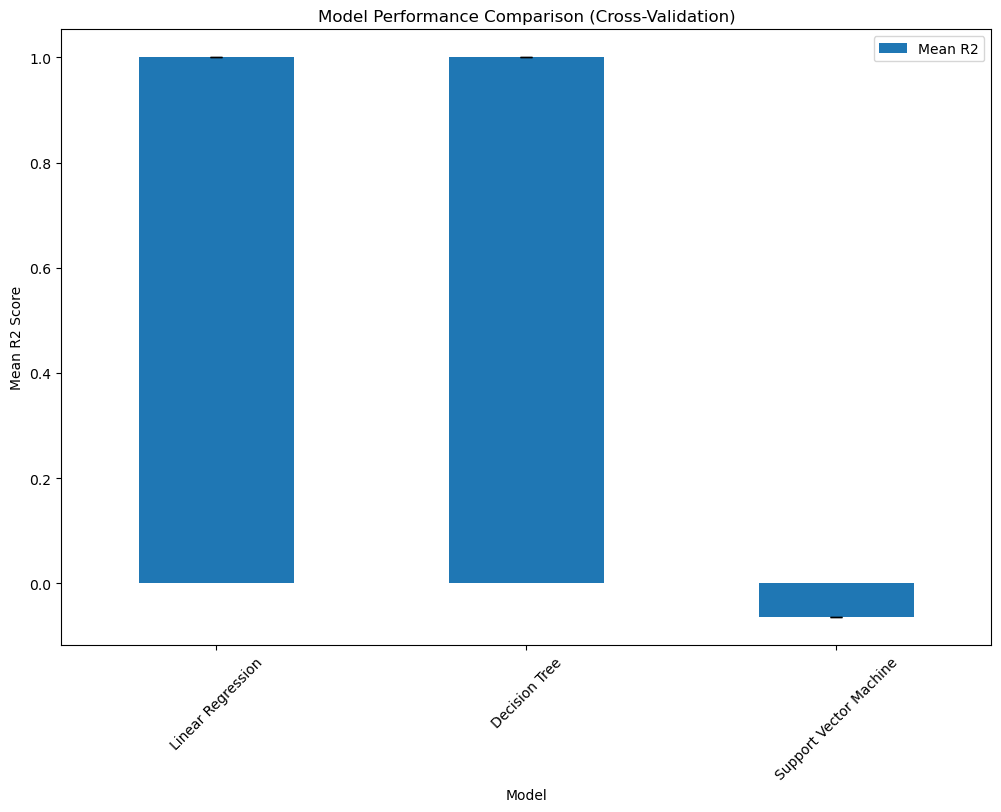

Model terbaik berdasarkan cross-validation adalah: Decision Tree dengan Mean R2 Score: 1.0000


In [10]:
from sklearn.model_selection import cross_val_score

# Fungsi untuk melakukan cross-validation dan menghitung nilai rata-rata metrik evaluasi
def evaluate_model(model, X, y):
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    cv_results = cross_val_score(pipeline, X, y, cv=5, scoring='r2')  # Menggunakan R2 sebagai metrik
    return cv_results.mean(), cv_results.std()

# Evaluasi model menggunakan cross-validation
cv_results = {}
for name, model in models.items():
    mean_r2, std_r2 = evaluate_model(model, X, y)
    cv_results[name] = {
        'Mean R2': mean_r2,
        'Std R2': std_r2
    }

# Menampilkan hasil evaluasi cross-validation
cv_results_df = pd.DataFrame(cv_results).T
print(cv_results_df)

# Visualisasi hasil
cv_results_df[['Mean R2']].plot(kind='bar', yerr=cv_results_df['Std R2'], figsize=(12, 8), capsize=4)
plt.title('Model Performance Comparison (Cross-Validation)')
plt.xlabel('Model')
plt.ylabel('Mean R2 Score')
plt.xticks(rotation=45)
plt.show()

# Memilih model terbaik berdasarkan rata-rata R2 dari cross-validation
best_cv_model_name = cv_results_df['Mean R2'].idxmax()
best_cv_model_score = cv_results_df['Mean R2'].max()

print(f"Model terbaik berdasarkan cross-validation adalah: {best_cv_model_name} dengan Mean R2 Score: {best_cv_model_score:.4f}")

**STAGE 4 Model Selection and Deployment**